In [26]:
import pandas as pd
import os
from glob import glob
import missingno
#sales analysis project

In [6]:
#open all files as a sorted list

data_files = sorted(glob(r'C:\Users\patri\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_*.csv'))
data_files

['C:\\Users\\patri\\Downloads\\Pandas-Data-Science-Tasks-master\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_April_2019.csv',
 'C:\\Users\\patri\\Downloads\\Pandas-Data-Science-Tasks-master\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_August_2019.csv',
 'C:\\Users\\patri\\Downloads\\Pandas-Data-Science-Tasks-master\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_December_2019.csv',
 'C:\\Users\\patri\\Downloads\\Pandas-Data-Science-Tasks-master\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_February_2019.csv',
 'C:\\Users\\patri\\Downloads\\Pandas-Data-Science-Tasks-master\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_January_2019.csv',
 'C:\\Users\\patri\\Downloads\\Pandas-Data-Science-Tasks-master\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_July_2019.csv',
 'C:\\Users\\patri\\Downloads\\Pandas-Data-Science-Tasks-master\\Pandas-Data-Science-Tasks-master\

In [7]:
#merge files into one file

merge_df = pd.concat(pd.read_csv(datafile).assign(sourcefilename = datafile)
                     for datafile in data_files)

In [10]:
merge_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sourcefilename
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",C:\Users\patri\Downloads\Pandas-Data-Science-T...
1,NaN,NaN,NaN,NaN,NaN,NaN,C:\Users\patri\Downloads\Pandas-Data-Science-T...
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",C:\Users\patri\Downloads\Pandas-Data-Science-T...
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",C:\Users\patri\Downloads\Pandas-Data-Science-T...
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",C:\Users\patri\Downloads\Pandas-Data-Science-T...


In [9]:
#save files as merged.csv

merge_df.to_csv(r'C:\Users\patri\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\merged.csv')

In [17]:
data = pd.read_csv(r'C:\Users\patri\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\merged.csv')

In [18]:
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sourcefilename
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",C:\Users\patri\Downloads\Pandas-Data-Science-T...
1,1,NaN,NaN,NaN,NaN,NaN,NaN,C:\Users\patri\Downloads\Pandas-Data-Science-T...
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",C:\Users\patri\Downloads\Pandas-Data-Science-T...
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",C:\Users\patri\Downloads\Pandas-Data-Science-T...
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",C:\Users\patri\Downloads\Pandas-Data-Science-T...


###clean up data

In [22]:
#drop rows of nan

nan_df = data[data.isna().any(axis=1)]
nan_df.head()

data = data.dropna(how='all')


In [23]:
# find 'or' and delete it

data = data[data['Order Date'].str[0:2] != 'Or']

In [44]:
#convert columns to correct data type

data2['Quantity Ordered'] =pd.to_numeric(data2['Quantity Ordered'])#make int
data2['Price Each']=pd.to_numeric(data2['Price Each'])#make float


<ipython-input-44-a5a21ce253af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Quantity Ordered'] =pd.to_numeric(data2['Quantity Ordered'])#make int
<ipython-input-44-a5a21ce253af>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Price Each']=pd.to_numeric(data2['Price Each'])#make float


<AxesSubplot:>

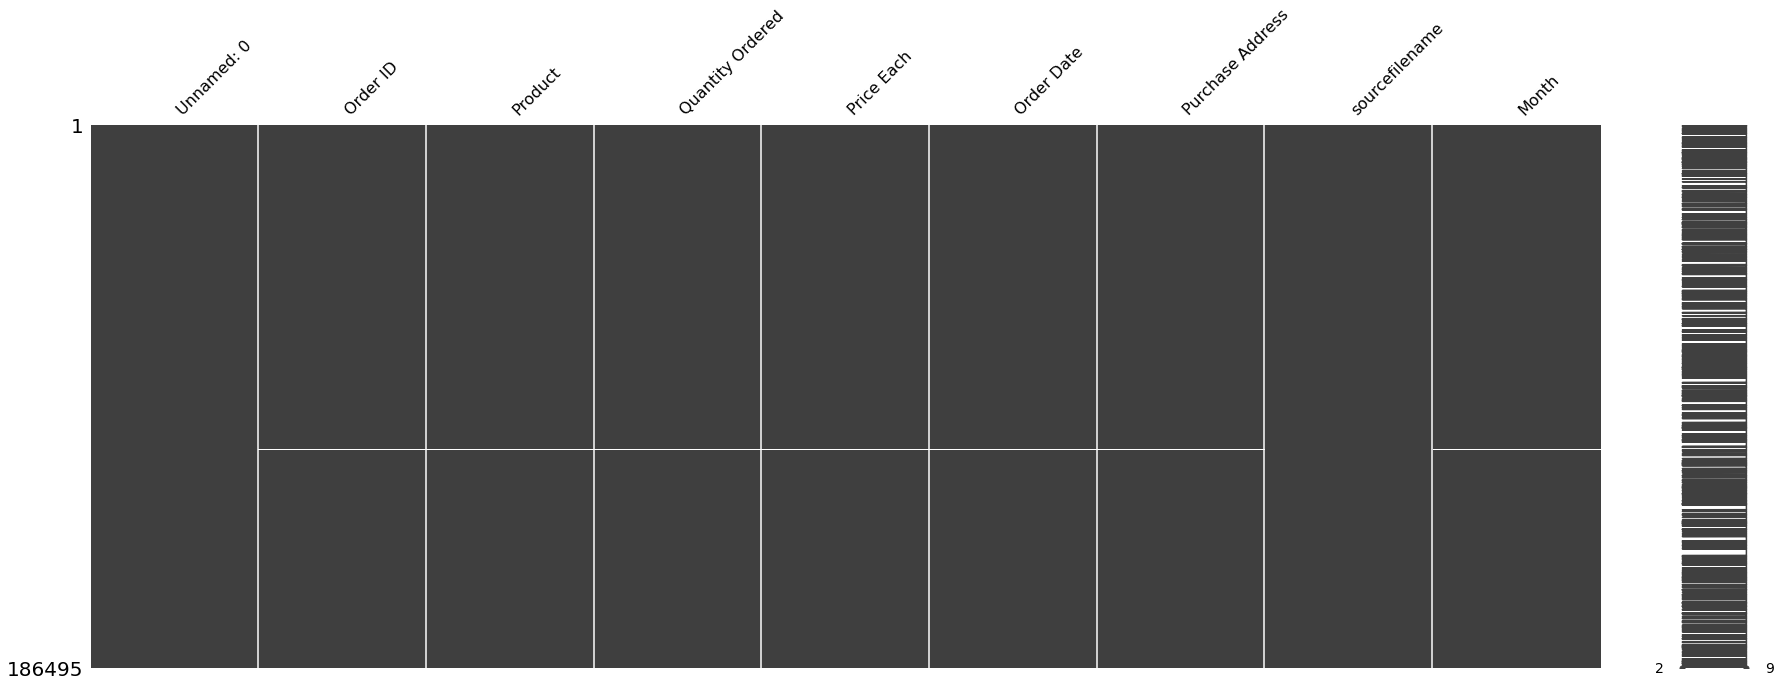

In [29]:
missingno.matrix(data, figsize = (30,10))

In [28]:
data = data.dropna(how='all')

### augment data with additional columns

In [42]:
# add a month column

data2['Month'] = data2['Order Date'].str[0:2]
data2['Month'] = data2['Month'].astype('int32')
data2.head()

<ipython-input-42-147a10c2b83f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Month'] = data2['Order Date'].str[0:2]
<ipython-input-42-147a10c2b83f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Month'] = data2['Month'].astype('int32')


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sourcefilename,Month
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4


In [43]:
data2.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sourcefilename,Month
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4


In [41]:
data2=data.dropna(how='any')
data2.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sourcefilename,Month
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,04
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",C:\Users\patri\Downloads\Pandas-Data-Science-T...,04
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,04
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,04
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,04


In [45]:
#add a sales column

data2['Sales']=data2['Quantity Ordered'] * data2['Price Each']
data2.head()

<ipython-input-45-3b1fc101d0e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Sales']=data2['Quantity Ordered'] * data2['Price Each']


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sourcefilename,Month,Sales
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4,23.90
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4,99.99
3,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4,600.00
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4,11.99
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4,11.99


In [48]:
#what was the best month for sales? how much was earned that month?----dec

results=data2.groupby('Month').sum()
results

,Unnamed: 0,Quantity Ordered,Price Each,Sales
Month,,,,
1,47433245,10903,1.811768e+06,1.822257e+06
2,72123197,13449,2.188885e+06,2.202022e+06
3,115333587,17005,2.791208e+06,2.807100e+06
4,167977608,20558,3.367671e+06,3.390670e+06
5,137829259,18667,3.135125e+06,3.152607e+06
6,92330356,15253,2.562026e+06,2.577802e+06
7,102752005,16072,2.632540e+06,2.647776e+06
8,71824951,13448,2.230345e+06,2.244468e+06
9,67863032,13109,2.084992e+06,2.097560e+06


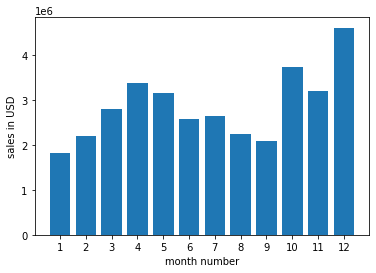

In [51]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('sales in USD')
plt.xlabel('month number')
plt.show()

#####what us city had highest number of sales

In [65]:
#add a city column
#need to take city out of purchase address--use apply method

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]


data2['City']= data2['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))
#dropped the column 
data2.head()

<ipython-input-65-488a92ea298d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['City']= data2['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sourcefilename,Month,Sales,City
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4,23.90,Dallas TX
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4,99.99,Boston MA
3,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4,600.00,Los Angeles CA
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4,11.99,Los Angeles CA
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4,11.99,Los Angeles CA


In [66]:
results=data2.groupby('City').sum()
results

,Unnamed: 0,Quantity Ordered,Price Each,Month,Sales
City,,,,,
Atlanta GA,122928154,16602,2.779908e+06,104794,2.795499e+06
Austin TX,82709457,11153,1.809874e+06,69829,1.819582e+06
Boston MA,165758780,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,124308328,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,247743297,33289,5.421435e+06,208325,5.452571e+06
New York City NY,208439450,27932,4.635371e+06,175741,4.664317e+06
Portland ME,20641344,2750,4.471893e+05,17144,4.497583e+05
Portland OR,83402354,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,372569180,50239,8.211462e+06,315520,8.262204e+06


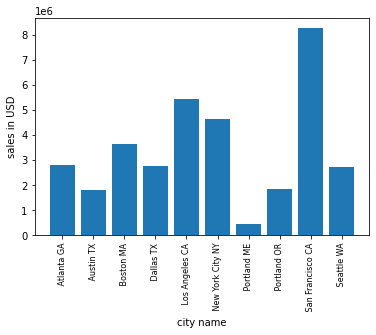

In [69]:
cities = [city for city,df in data2.groupby('City')]
plt.bar(cities,results['Sales'])
plt.xticks(cities, rotation='vertical',size=8)
plt.ylabel('sales in USD')
plt.xlabel('city name')
plt.show()

###what time to display advertisements to maximize likelihood of customer buying product?

In [70]:
data2.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sourcefilename,Month,Sales,City
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4,23.90,Dallas TX
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4,99.99,Boston MA
3,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4,600.00,Los Angeles CA
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4,11.99,Los Angeles CA
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4,11.99,Los Angeles CA


In [71]:
data2['Order Date']=pd.to_datetime(data2['Order Date'])

<ipython-input-71-451c02d88822>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Order Date']=pd.to_datetime(data2['Order Date'])


In [72]:
data2.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sourcefilename,Month,Sales,City
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4,23.90,Dallas TX
2,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4,99.99,Boston MA
3,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4,600.00,Los Angeles CA
4,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4,11.99,Los Angeles CA
5,5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4,11.99,Los Angeles CA


In [74]:
#add hour column

data2['Hour']=data2['Order Date'].dt.hour
data2['Minute']=data2['Order Date'].dt.minute
data2.head()

<ipython-input-74-3f2e55150421>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Hour']=data2['Order Date'].dt.hour
<ipython-input-74-3f2e55150421>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Minute']=data2['Order Date'].dt.minute


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sourcefilename,Month,Sales,City,Hour,Minute
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4,23.90,Dallas TX,8,46
2,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4,99.99,Boston MA,22,30
3,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4,600.00,Los Angeles CA,14,38
4,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4,11.99,Los Angeles CA,14,38
5,5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",C:\Users\patri\Downloads\Pandas-Data-Science-T...,4,11.99,Los Angeles CA,9,27


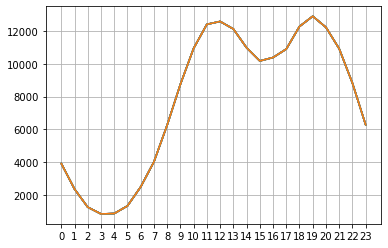

In [80]:
hour = [hour for hour,df in data2.groupby('Hour')]
plt.plot(hour,data2.groupby(['Hour']).count())
plt.xticks(hour)
plt.grid()
plt.show()

In [78]:
##11am to 7pm are peak times..6/7pm and 10-1pm high viewing times (11) and (19) on graph

data2.groupby(['Hour']).count()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sourcefilename,Month,Sales,City,Minute
Hour,,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


###what products are most often sold together?

In [85]:
#first find duplicate rows or "sales"
#next make a grouped column and join products in column

data_f=data2[data2['Order ID'].duplicated(keep=False)]

data_f['Grouped']=data_f.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
data_f =data_f[['Order ID','Grouped']].drop_duplicates()

data_f.head()

<ipython-input-85-e4a3c77a4214>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['Grouped']=data_f.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [86]:
from itertools import combinations
from collections import Counter

In [88]:
count = Counter()

for row in data_f['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [89]:
## most common purchases are ('iPhone', 'Lightning Charging Cable') 1005 (pairs)

#most common bought 3-------('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87


count = Counter()

for row in data_f['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,3)))

for key, value in count.most_common(10):
    print(key,value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


###what product sold the most and why?

In [90]:
product_group = data2.groupby('Product')
product_group.sum()

,Unnamed: 0,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,,
20in Monitor,34263700,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,52531482,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,62800951,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,51318688,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),170984790,27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),171339939,31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,129879472,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,111875345,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,39883719,4819,1440000.00,34224,1445700.00,68815,142789


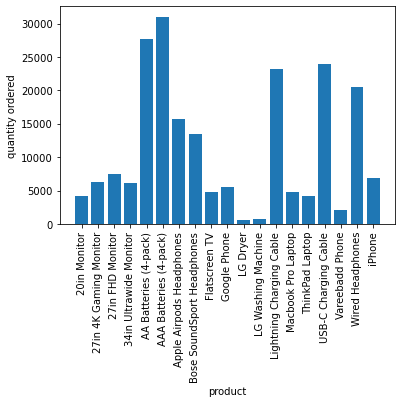

In [92]:
quantity_ordered =product_group.sum()['Quantity Ordered']

products = [product for product,df in product_group]
plt.bar(products,quantity_ordered)
plt.xticks(products, rotation='vertical',size=10)
plt.ylabel('quantity ordered')
plt.xlabel('product')
plt.show()

In [93]:
#find the average prices of products

prices = data2.groupby('Product').mean()['Price Each']

prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<ipython-input-96-bcb489fe2dcf>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=10)


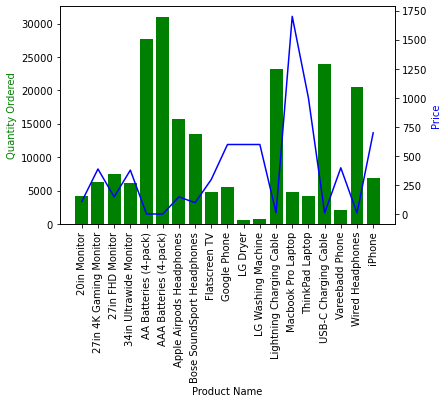

In [96]:
fig, ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered',color='g')
ax2.set_ylabel('Price', color='b')
ax1.set_xticklabels(products,rotation='vertical',size=10)

plt.show()